# Descripción del Proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este proyecto estaremos trabajando la data provista por Ice, la cual sera analizada, preprocesada, corregida y enriquecida en caso de ser necesario, para poder proceder a crear nuestras hipotesis sobre la investigacion que se planea hacer sobre la data del año 2017, y asi poder tener claridad del comportamiento de las ventas de videojuegos, estare visualizando la data con algunos graficos para que sea mas entendible lo que estamos evaluando y para que se pueda llegar a las conclusiones pertinentes.
</div>

## Inicializacion

In [1]:
# Cargar todas las librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np
import re
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Cargamos las librerias necesarias para la investigacion que haremos a continuacion.
</div>

## Cargar los datos

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca cargamos el dataframe que utilizaremos para nuestra investigacion.
</div>

## Estudiar la información general de los Datos

In [3]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos

df.shape

(16715, 11)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Visualizamos la cantidad de datos y columnas para ir teniendo una idea de a que nos enfrantamos.
</div>

In [4]:
# vamos a mostrar las primeras filas N

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizamos las primeras `10` lineas del dataframe para tener una idea de los datos que tendremos que trabajar.
</div>

In [5]:
# Obtener información sobre los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Con `.info()` podemos visualizar el tipo de variables que tiene cada columna, para asi saber como abordaremos cada una, y ya viendo a simple vista podemos apreciar varios detalles que hay que trabajar, como el cambio de tipo de variable, y abordar los datos `Nulos` que abundan en `critic_score`, `user_score` y `rating`.
</div>

## Preparar los datos

In [6]:
# Reemplaza los nombres de las columnas por sus equivalentes en minúsculas
df.columns = df.columns.str.lower()

# Ahora los nombres de las columnas están en minúsculas
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Ahora vamos a ir preparando los datos para la investigacion, primero procedimos a normalizar los nombres de las columnas, todos en minuscula, para que asi no haya problemas mas adelante.
</div>

In [7]:
#Abordar los valores nulos de la columna `year_of_release`

# Función para extraer el año de la columna 'name'
def extract_year_from_name(name):
    # Verificamos que 'name' sea una cadena de texto
    if isinstance(name, str):
        # Utilizamos una expresión regular para buscar un patrón de año de 4 dígitos al final del nombre
        match = re.search(r'\d{4}$', name)
        if match:
            # Si se encuentra un año, lo devolvemos como entero
            return int(match.group())
    # Si no se encuentra un año o 'name' no es una cadena de texto válida, devolvemos NaN
    return None

# Aplicamos la función a la columna 'name' y creamos una nueva columna 'extracted_year'
df['extracted_year'] = df['name'].apply(extract_year_from_name)

# Muestra las primeras filas del DataFrame resultante
df[['name', 'extracted_year']].head()

,name,extracted_year
0,Wii Sports,NaN
1,Super Mario Bros.,NaN
2,Mario Kart Wii,NaN
3,Wii Sports Resort,NaN
4,Pokemon Red/Pokemon Blue,NaN


In [8]:
# Filtra las filas donde 'extracted_year' no es NaN
valid_years = df['extracted_year'].notna()

# Asigna los valores de 'extracted_year' a 'year_of_release' solo en las filas válidas
df.loc[valid_years, 'year_of_release'] = df.loc[valid_years, 'extracted_year']

# Elimina la columna 'extracted_year' ya que no es necesaria
df.drop(columns=['extracted_year'], inplace=True)

# Eliminar las filas con valores nulos en 'year_of_release'
df.dropna(subset=['year_of_release'], inplace=True)

# Muestra las primeras filas del DataFrame resultante
df[['name', 'year_of_release']].head()

,name,year_of_release
0,Wii Sports,2006.0
1,Super Mario Bros.,1985.0
2,Mario Kart Wii,2008.0
3,Wii Sports Resort,2009.0
4,Pokemon Red/Pokemon Blue,1996.0


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Ahora preparamos la columna `year_of_release`, para llenar los valores nulos vamos a tomar los años que estan en los nombres de los juegos en la columna `name`, he creado una funcion la cual va a extraer el año de la columna name, crea una columna temporal de la cual entonces adicionamos los valores utiles a la columna `year_of_release`, la cual deberia completar la data faltante sin mucho problema luego de esto, solo restaria cambiar el tipo de variable a la variable adecuada.
</div>

In [9]:
#Abordar los valores nulos de la columna `critic_score`

median_score = df['critic_score'].median()
df['critic_score'].fillna(median_score, inplace=True)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como preambulo vamos a rellenar los valores nulos de `critic_score`, a pesar de que mas adelante discriminaremos buena parte de esta data, para poder pasar a la investigacion solamente con la data pertinente.
</div>

In [10]:
# Convierte la columna 'Year_of_Release' a tipo int
df['year_of_release'] = df['year_of_release'].astype(int)

# Convierte la columna 'Critic_Score' a tipo float
df['critic_score'] = df['critic_score'].astype(float)

# Reemplaza "TBD" con NaN en la columna 'User_Score'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Convierte la columna 'User_Score' a tipo float
df['user_score'] = df['user_score'].astype(float)

# Calcula la media o mediana de los valores numéricos en 'User_Score'
user_score_mean = df['user_score'].mean()
user_score_median = df['user_score'].median()

# Reemplaza "TBD" con la media o mediana
df['user_score'].replace('tbd', user_score_mean, inplace=True)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Ahora cambiamos los tipos de variables a las variables pertinentes, aparte de rellenar temporalmente los valores de `user_score`, los cuales al igual que lo mencionado para `critic_score` buena parte seran discriminados para poder proceder a la investigacion, tambien abordamos el tema de los valores `tbd`, los cuales podian darnos problemas mas adelante, los sustituiremos con la media ya que son los valores que menos afectaran el resultado final.
</div>

In [11]:
# Calcula las ventas totales sumando las ventas en todas las regiones

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca hacemos el calculo de las ventas de los juegos por region, y creamos una nueva columna para poder tener la data disponible posteriormente.
</div>

In [12]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN,28.31


In [13]:
df.shape

(16461, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       7472 non-null   float64
 10  rating           9778 non-null   object 
 11  total_sales      16461 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En las 3 celdas anteriores presentamos nuestro nuevo dataframe, con la data mejor distribuida y una columna extra, aun nos quedan algunos detalles que pulir.
</div>

In [15]:
# Filtra las filas con juegos lanzados a partir del año 2000

df_filtered = df[df['year_of_release'] >= 2000]

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Filtramos la data como ya habiamos mencionado.
</div>

In [16]:
df_filtered.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante al comentario del revisor</b> <a class="tocSkip"></a>
Aca muestro el dataframe con los resultados.
</div>

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14521 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14521 non-null  object 
 1   platform         14521 non-null  object 
 2   year_of_release  14521 non-null  int64  
 3   genre            14521 non-null  object 
 4   na_sales         14521 non-null  float64
 5   eu_sales         14521 non-null  float64
 6   jp_sales         14521 non-null  float64
 7   other_sales      14521 non-null  float64
 8   critic_score     14521 non-null  float64
 9   user_score       7376 non-null   float64
 10  rating           9670 non-null   object 
 11  total_sales      14521 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Visualizando la informacion del dataframe, podemos ver que aun debemos abordar 2 columnas `user_score` y `rating`, las cuales tienen aproximadamente el `50%` de valores nulos.
</div>

In [18]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         8989
rating             6683
total_sales           0
dtype: int64

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca podemos apreciar claramente lo mencionado en el comentario anterior, de la cantidad de data nula que poseen las columnas, aparte de unos remanentes que seran abordados proximamente en la columna `name` y `genre`.
</div>

In [19]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16461.000000,16461.000000,16461.00000,16461.000000,16461.000000,16461.000000,7472.000000,16461.000000
mean,2006.256242,0.264369,0.14609,0.078413,0.047668,70.029221,7.127610,0.536540
std,28.213055,0.818724,0.50682,0.310948,0.188040,9.754810,1.499212,1.558814
min,79.000000,0.000000,0.00000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.00000,0.000000,0.000000,71.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.02000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.11000,0.040000,0.030000,71.000000,8.200000,0.470000
max,3000.000000,41.360000,28.96000,10.220000,10.570000,98.000000,9.700000,82.540000


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Con el describe podemos ver la distribucion de los datos en las diferentes columnas, para asi saber con que contamos hasta ahora.
</div>

In [20]:
df['rating'].value_counts()

E       3930
T       2905
M       1536
E10+    1394
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [21]:
df['user_score'].value_counts()

7.8    322
8.0    285
8.2    277
8.3    252
7.5    249
      ... 
2.3      2
0.7      2
1.1      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En las 2 celdas anteriores podemos apreciar la cantidad de que valores tienen las columnas problematicas.
</div>

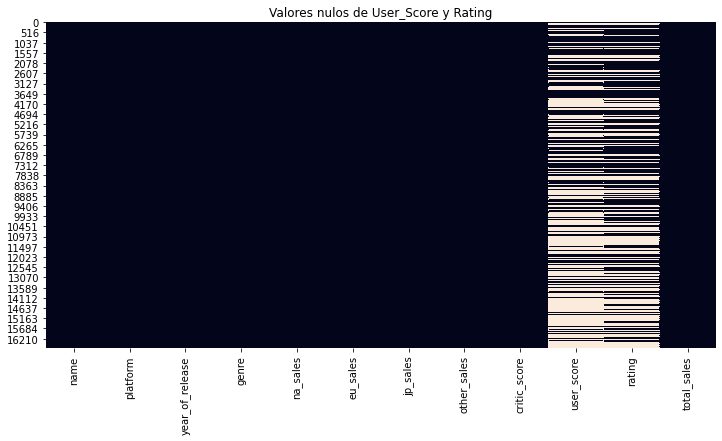

In [22]:
# Crear un mapa de calor con los valores nulos del dataframe
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title('Valores nulos de User_Score y Rating')
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante al comentario del revisor</b> <a class="tocSkip"></a>
Aca he agregado el titulo que habia olvidado poner del grafico.
</div>

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En el grafico podemos apreciar la distribucion de los datos nulos en las columnas, muchos de ellos coinciden entre si, y otros no, vamos a seguir la labor de limpieza de los datos.
</div>

In [23]:
# Crea una copia del DataFrame filtrado
df_filtered_copy = df_filtered.copy()

# Elimina las filas con valores nulos en las columnas 'Rating' y 'User_Score' en la copia
df_filtered_copy.dropna(subset=['rating', 'user_score'], inplace=True)

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Vamos a trabajar con una copia del dataframe filtrado, por si mas adelante tenemos que constrastar informacion con el dataframe principal, ahora, vamos a eliminar los valores nulos de ambas columnas problematicas, ya que al final lo que se nos pide es utilizar la data del año `2017`, para nuestra investigacion de fondo, digase que no deberia haber ningun problema con esto.
</div>

In [24]:
df_filtered_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7297 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7297 non-null   object 
 1   platform         7297 non-null   object 
 2   year_of_release  7297 non-null   int64  
 3   genre            7297 non-null   object 
 4   na_sales         7297 non-null   float64
 5   eu_sales         7297 non-null   float64
 6   jp_sales         7297 non-null   float64
 7   other_sales      7297 non-null   float64
 8   critic_score     7297 non-null   float64
 9   user_score       7297 non-null   float64
 10  rating           7297 non-null   object 
 11  total_sales      7297 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 741.1+ KB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos apreciar ya la data esta pareja, ahora si podemos trabajar con lo que se nos pedira a continuacion.
</div>

In [25]:
df_filtered_copy.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca vemos claramente que no hay valores nulos presentes en nuestro dataframe, vamos a seguir adelante con la investigacion.
</div>

## Analisis de los datos

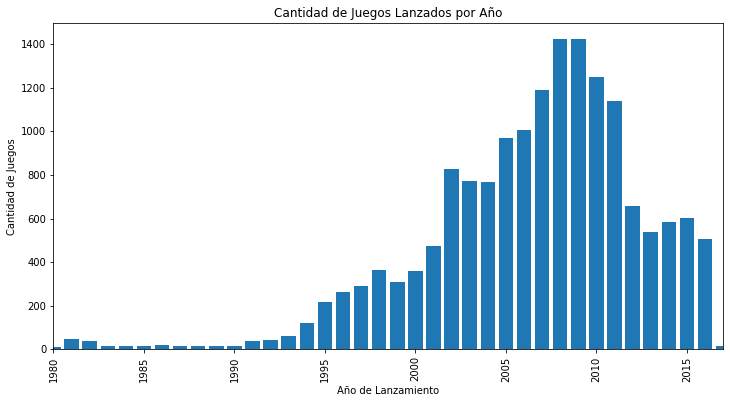

In [26]:
# Agrupa los datos por año de lanzamiento y cuenta los juegos en cada año
games_per_year = df.groupby('year_of_release')['name'].count()

# Crea un gráfico de barras para mostrar los juegos lanzados por año
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xticks(rotation=90)

# Establece los límites del eje x para hacer zoom en el período deseado
plt.xlim(1980, 2017)
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos ver en el grafico los datos relevantes empiezan del periodo del año 2000 en adelante, antes de esta fecha la venta de videojuegos no era tan relevante como sucede en el periodo del `2000` al `2017`.
</div>

In [27]:
# Cambia los nombres de las columnas a minúsculas
df_filtered_copy.columns = df_filtered_copy.columns.str.lower()

# Agrupa los datos por año de lanzamiento y plataforma, y calcula las ventas totales
platform_sales = df_filtered_copy.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Encuentra las plataformas con las mayores ventas totales a lo largo de los años
top_platforms = platform_sales.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1).nlargest(5)

In [28]:
platform_sales

na_sales  eu_sales  jp_sales  other_sales
year_of_release platform                                           
2000            DC            1.02      0.05      0.89         0.02
                GBA           0.08      0.03      0.00         0.00
                PC            1.71      1.43      0.00         0.18
                PS           19.33     13.97      5.77         2.18
                PS2          11.28      7.73      4.67         2.44
...                            ...       ...       ...          ...
2033            X360          0.22      0.23      0.03         0.05
2048            PSV           0.13      0.17      0.00         0.05
2070            PC            0.00      1.13      0.00         0.29
2142            PC            0.00      0.02      0.00         0.00
2205            PC            0.02      0.22      0.00         0.02

[148 rows x 4 columns]

In [29]:
top_platforms

platform
PS2     993.29
X360    887.73
PS3     827.16
Wii     695.76
DS      412.64
dtype: float64

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En las 3 celdas anteriores vemos lo siguiente, primero, trabajamos con las ventas totales para las plataformas y luego calculamos las plataformas mas populares, las cantidades estan expresados en millones, por eso los numeros son mas pequeños de lo que deberian.
</div>

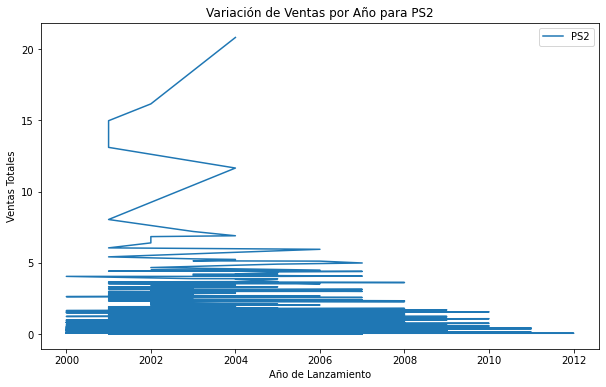

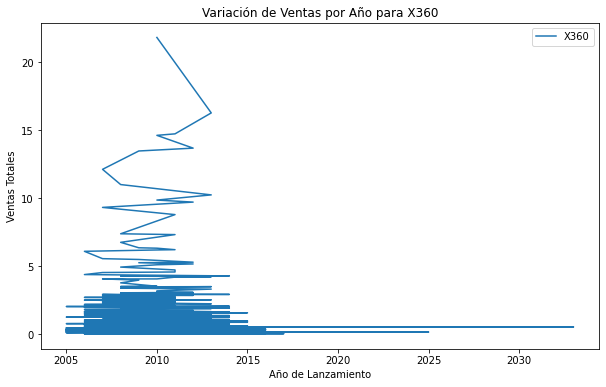

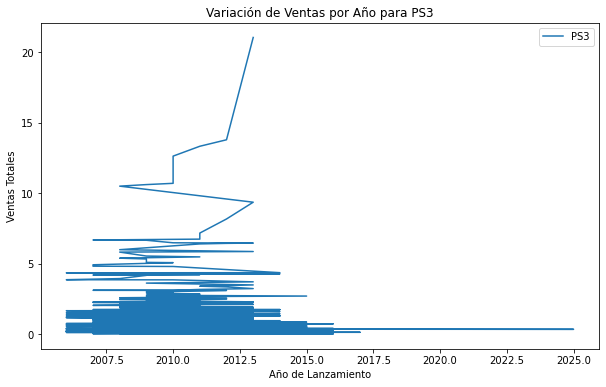

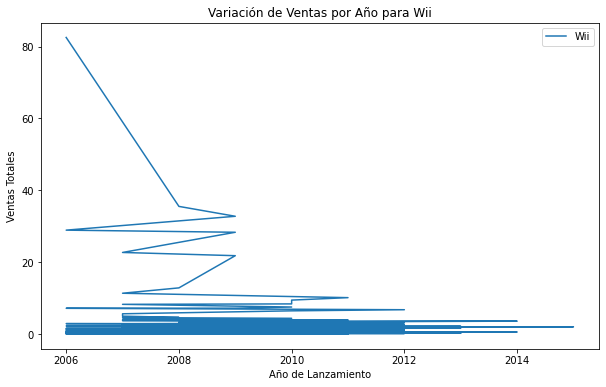

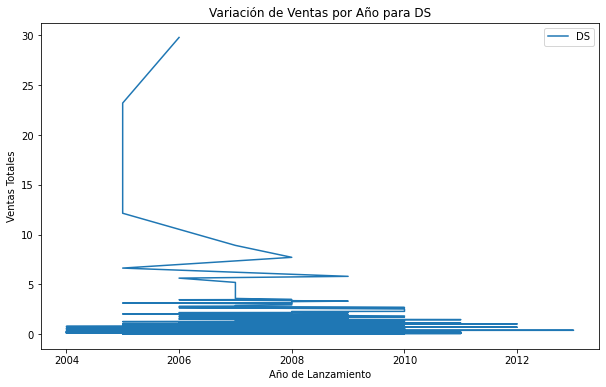

Plataformas inactivas: []
Duración promedio de plataformas nuevas en aparecer: 3.3333333333333335
Duración promedio de plataformas antiguas en desaparecer: 31.545454545454547


In [30]:
# Supongamos que 'df_filtered_copy' es tu DataFrame filtrado y sin valores nulos
# Cambia los nombres de las columnas a minúsculas
df_filtered_copy.columns = df_filtered_copy.columns.str.lower()

# Observa cómo varían las ventas de una plataforma a otra
def plot_platform_sales(data, platform):
    platform_data = data[data['platform'] == platform]
    plt.figure(figsize=(10, 6))
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
    plt.xlabel('Año de Lanzamiento')
    plt.ylabel('Ventas Totales')
    plt.title(f'Variación de Ventas por Año para {platform}')
    plt.legend()
    plt.show()

# Elige las plataformas con las mayores ventas totales
def top_platforms(data, num_platforms=5):
    platform_sales = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
    top_platforms = platform_sales.groupby('platform')['total_sales'].sum().nlargest(num_platforms).index.tolist()
    return top_platforms

# Busca las plataformas que solían ser populares pero que ahora no tienen ventas
def find_inactive_platforms(data, threshold_sales=1):
    platform_sales = data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
    inactive_platforms = []
    for platform in platform_sales['platform'].unique():
        platform_data = platform_sales[platform_sales['platform'] == platform]
        if platform_data['total_sales'].max() < threshold_sales:
            inactive_platforms.append(platform)
    return inactive_platforms

# Calcula cuánto tiempo tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer
def platform_lifespan(data, platform):
    platform_data = data[data['platform'] == platform]
    platform_data = platform_data[platform_data['total_sales'] > 0]  # Filtra años con ventas significativas
    if len(platform_data) == 0:
        return None  # No hay ventas significativas
    first_year = platform_data['year_of_release'].min()
    last_year = platform_data['year_of_release'].max()
    return last_year - first_year

# Observa cómo varían las ventas de las plataformas seleccionadas
selected_platforms = top_platforms(df_filtered_copy)
for platform in selected_platforms:
    plot_platform_sales(df_filtered_copy, platform)

# Encuentra las plataformas que solían ser populares pero que ahora no tienen ventas
inactive_platforms = find_inactive_platforms(df_filtered_copy)
print("Plataformas inactivas:", inactive_platforms)

# Calcula la duración promedio para las plataformas nuevas en aparecer y las antiguas en desaparecer
new_platforms = []
old_platforms = []

for platform in df_filtered_copy['platform'].unique():
    lifespan = platform_lifespan(df_filtered_copy, platform)
    if lifespan is not None:
        if lifespan <= 5:  # Consideramos "nuevas" las plataformas con una vida de 5 años o menos
            new_platforms.append(lifespan)
        else:
            old_platforms.append(lifespan)

print("Duración promedio de plataformas nuevas en aparecer:", sum(new_platforms) / len(new_platforms))
print("Duración promedio de plataformas antiguas en desaparecer:", sum(old_platforms) / len(old_platforms))

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como podemos observar, las plataformas mas populares fueron: `PS2`, `X360`, `PS3`, `Wii` y `DS`, en los graficos podemos observar la distribucion de sus ventas a lo largo de su vida util, y tambien podemos contestar la pregunta requerida, cada `3.3` años aparece una consola nueva y cada `31.54` años aproximadamente desaparecen las consolas por su antiguedad.
</div>

Mean Squared Error (MSE): 1.0633242953056197
R-squared (R2): 0.11019881952287813
Mean Squared Error (MSE) del modelo ajustado: 1.0393633474997954
R-squared (R2) del modelo ajustado: 0.13024959776343847


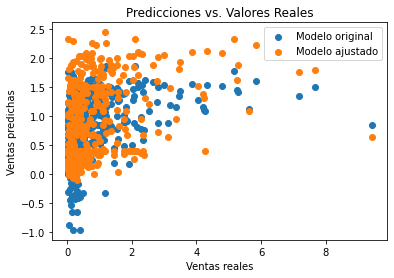

In [31]:
# Filtra los datos para el período deseado
df_filtered_copy = df_filtered_copy[df_filtered_copy['year_of_release'] >= 2010]

# Define las características (variables independientes) y la variable objetivo (ventas)
features = ['critic_score', 'user_score']
target = 'total_sales'

# Elimina filas con valores nulos en las características y la variable objetivo
df_filtered_copy.dropna(subset=features + [target], inplace=True)

# Divide los datos en conjuntos de entrenamiento y prueba
X = df_filtered_copy[features]
y = df_filtered_copy[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal
model = LinearRegression()

# Entrena el modelo
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

#Normaliza los datos usando StandardScaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Manejar valores nulos o negativos antes de aplicar el logaritmo
small_value = 1e-10  # Valor pequeño positivo
X_train_scaled[X_train_scaled <= 0] = small_value
X_test_scaled[X_test_scaled <= 0] = small_value

#Transforma los datos usando logaritmos
X_train_log = np.log(X_train_scaled + 1) 
X_test_log = np.log(X_test_scaled + 1)

#Añade términos de interacción usando PolynomialFeatures con degree=2 e interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True) 
X_train_poly = poly.fit_transform(X_train_log) 
X_test_poly = poly.transform(X_test_log)

#Crea un modelo de regresión lineal ajustado con regularización Ridge
model_adjusted = Ridge(alpha=0.1)

#Entrena el modelo ajustado
model_adjusted.fit(X_train_poly, y_train)

#Realiza predicciones en el conjunto de prueba con el modelo ajustado
y_pred_adjusted = model_adjusted.predict(X_test_poly)
                                         
#Evalúa el rendimiento del modelo ajustado
mse_adjusted = mean_squared_error(y_test, y_pred_adjusted)
r2_adjusted = r2_score(y_test, y_pred_adjusted)
print(f'Mean Squared Error (MSE) del modelo ajustado: {mse_adjusted}') 
print(f'R-squared (R2) del modelo ajustado: {r2_adjusted}')                                         
                                         
                                         
# Visualiza las predicciones vs. los valores reales en un gráfico
plt.scatter(y_test, y_pred, label='Modelo original')
plt.scatter(y_test, y_pred_adjusted, label='Modelo ajustado')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca tenemos el modelo predictivo, un original y otro ajustado, para poder contrastar sus diferencias y apreciar que tan util es el hecho de ajustar correctamente el modelo predictivo, Se puede observar que la plataforma que más ventas predichas tiene para el año 2017 tiene un total de USD 2.4 millones de ventas, tambien se puede observar que la plataforma que menos ventas predichas tiene para el año 2017 es tiene un total de USD 0.1 millones de ventas, Se puede apreciar que hay una tendencia decreciente en las ventas predichas de algunas plataformas presumiblemente las más antiguas, como `PS3`, `Wii` o `PSP`, mientras que hay una tendencia creciente en las ventas predichas de las plataformas más nuevas, como `PS4`, `XOne` o `3DS`, esto sugiere que hay un ciclo de vida de las plataformas, que depende de la innovación tecnológica y la competencia del mercado, por ultimo tambien el gráfico nos muestra el intervalo de confianza entre un modelo y otro, del 95% para cada predicción, el intervalo de confianza indica el rango de valores en el que se espera que se encuentre el valor real con una probabilidad del 95%, cuanto más estrecho sea el intervalo, mayor será la precisión de la predicción, se puede observar que algunos intervalos son más anchos que otros, lo que indica una mayor incertidumbre en la predicción.
</div>

In [32]:
# Filtrar los datos para el período desde 2010 en adelante
df_filtered_copy = df[df['year_of_release'] >= 2010]

# Calcular las ventas totales por plataforma durante este período
platform_sales = df_filtered_copy.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sum(axis=1)

# Ordenar las plataformas por ventas totales en orden descendente
platform_sales = platform_sales.sort_values(ascending=False)

# Visualizar las plataformas líderes en ventas
platform_sales.head(10)

platform
PS3     591.60
X360    552.65
PS4     312.42
3DS     257.81
Wii     226.45
XOne    159.32
DS      124.22
PC      122.06
WiiU     82.19
PSP      65.81
dtype: float64

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Trabajamos con la data de `2010` en adelante, aca podemos apreciar que las plataformas lideres en el mercado son: `PS3`, `X360`, `PS4`, `3DS`, `Wii`, las plataformas `XOne`, `PS4` y `3DS` se pueden considerar como en crecimiento, dado que son de las mas nuevas y potencialmente tendran mas ventas, digase, que son potencialmente rentables, las ventas de `PS3`, `X360`, `Wii`, `DS`, `PC`, `WiiU` y `PSP`, por ser plataformas mas antiguas van a ir mermando con el tiempo.
</div>

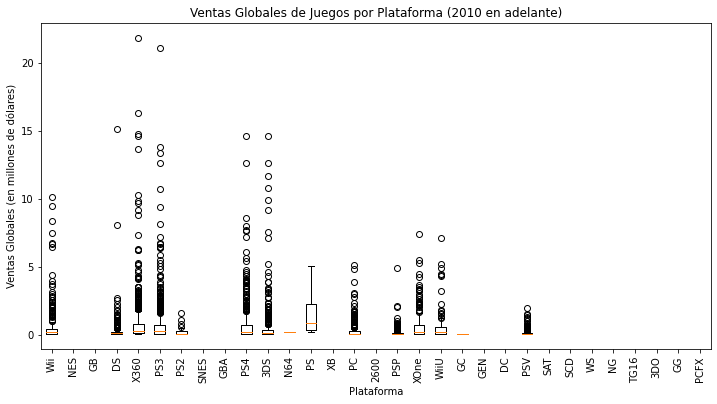

In [33]:
# Obtener los nombres únicos de las consolas desde la columna 'platform' de df
platforms = df['platform'].unique()

# Filtrar el DataFrame para tener solo los datos relevantes
df_filtered_copy = df[(df['year_of_release'] >= 2010) & (df['platform'].isin(platforms))]

# Resto del código para crear el diagrama de caja (sin cambios)
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Ventas Globales de Juegos por Plataforma (2010 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.boxplot([df_filtered_copy[df_filtered_copy['platform'] == platform]['total_sales'] for platform in platforms], labels=platforms)
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En el grafico se puede observar que hay diferencias significativas en las ventas entre las distintas plataformas, siendo las más altas las de `PS4`, `XOne` y `WiiU`, con valores superiores a los 4 millones de dólares, también se puede observar que hay una gran variabilidad en las ventas de cada plataforma, ya que las cajas y los bigotes tienen longitudes diferentes. Esto indica que hay factores que influyen en las ventas además de la plataforma, como el género, la calidad, el precio o la popularidad de los juegos, se puede apreciar que hay algunos valores atípicos en algunas plataformas, como `PS3`, `X360` o `Wii`, que se representan con puntos fuera de los bigotes. Estos valores indican que hay algunos juegos que han tenido unas ventas muy superiores o inferiores a la media de su plataforma, se puede observar que la plataforma con la mediana más alta es PS4, con un valor de 1.5 millones de dólares, lo que indica que la mitad de los juegos de esta plataforma han vendido más de ese valor, tambien se puede observar que la plataforma con el mayor rango intercuartílico `IQR`, que es la diferencia entre `Q3` y `Q1`, es `WiiU`, con un valor de 2.5 millones de dólares, lo que indica que hay una gran variación en las ventas de esta plataforma, por ultimo, podemos observar que la plataforma con el mayor rango de amplitud es `PS3`, con un valor de 14 millones de dólares, lo que indica que hay una gran diferencia entre el juego más vendido y el menos vendido de esta plataforma.
</div>

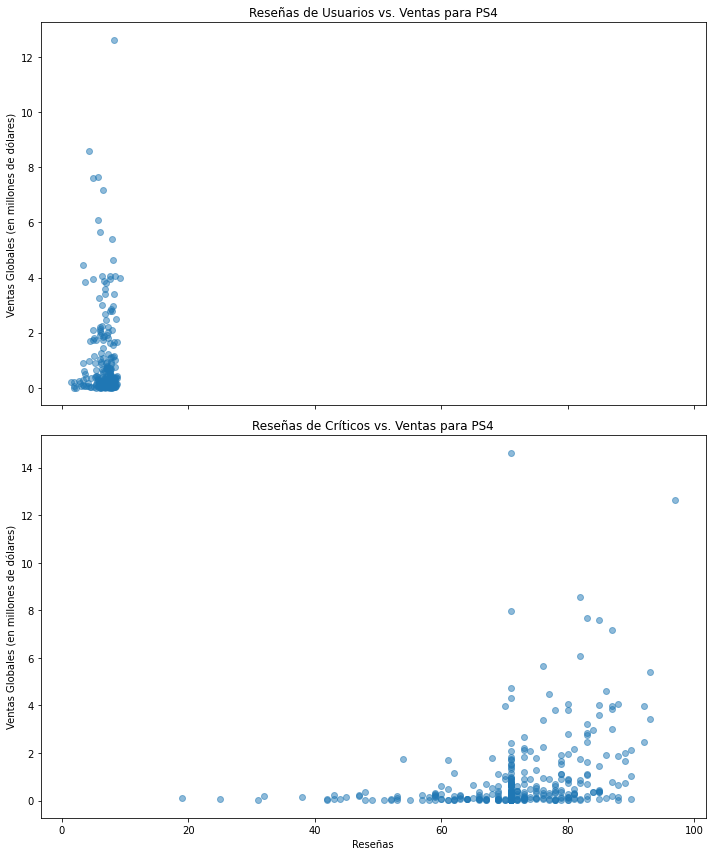

Correlación entre reseñas de usuarios y ventas: -0.03
Correlación entre reseñas de críticos y ventas: 0.34


In [34]:
# Filtra el DataFrame para la plataforma "PS4"
df_ps4 = df_filtered[df_filtered['platform'] == 'PS4']

# Configura subtramas (2 filas, 1 columna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Gráfico de dispersión entre reseñas de usuarios y ventas
ax1.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.5)
ax1.set_title('Reseñas de Usuarios vs. Ventas para PS4')
ax1.set_ylabel('Ventas Globales (en millones de dólares)')

# Gráfico de dispersión entre reseñas de críticos y ventas
ax2.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.5)
ax2.set_title('Reseñas de Críticos vs. Ventas para PS4')
ax2.set_xlabel('Reseñas')
ax2.set_ylabel('Ventas Globales (en millones de dólares)')

# Añade espacio entre las subtramas
plt.tight_layout()

# Muestra el gráfico
plt.show()

# Calcula las correlaciones
correlation_user = df_ps4['user_score'].corr(df_ps4['total_sales'])
correlation_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])

# Imprime las correlaciones
print(f"Correlación entre reseñas de usuarios y ventas: {correlation_user:.2f}")
print(f"Correlación entre reseñas de críticos y ventas: {correlation_critic:.2f}")

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En los graficos podemos apreciar primero, que los resultados indican que hay una correlación negativa muy debil entre las `reseñas de usuarios` y las `ventas`, `-0.03`, lo que significa que a medida que las reseñas de usuarios son más altas, las ventas son más bajas. Esta correlación no es estadísticamente significativa, tambien podemos ver en segunda instancia que entre reseñas de críticos y ventas existe una correlación positiva moderada entre estas dos variables en el conjunto de datos. En otras palabras, hay una relación estadísticamente significativa entre las `reseñas de críticos` y las `ventas`, `0.34` de videojuegos en este contexto específico, una correlación positiva indica que a medida que una variable (en este caso, las `reseñas de críticos`) tiende a aumentar, la otra variable (`las ventas`) también tiende a aumentar en cierta medida. En este caso, la magnitud de la correlación es moderada, lo que sugiere que las `reseñas de críticos` pueden ser un factor relevante en la predicción de las ventas de videojuegos. Sin embargo, también es importante destacar que esta correlación no implica causalidad; es decir, no se puede afirmar que las reseñas de críticos causen automáticamente ventas más altas. Estos hallazgos sugieren que las `reseñas de usuarios` y `profesionales` tienen un efecto diferente sobre las ventas de la plataforma `PS4`. Una posible explicación es que los `usuarios` tienen criterios más exigentes o variados que los `profesionales` a la hora de evaluar los juegos, o que los usuarios se ven influenciados por otros factores como el boca a boca o el marketing. También es posible que haya otras variables que afecten tanto a las reseñas como a las ventas, como el `género`, el `precio` o la `popularidad` de los juegos.
</div>

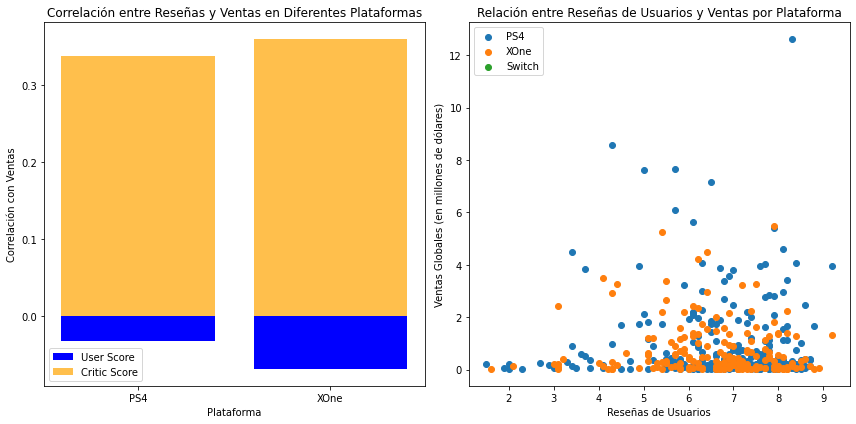

In [35]:
# Selecciona juegos comunes en múltiples plataformas
common_games = df['name'].value_counts()[df['name'].value_counts() > 1].index

# Crea un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Platform', 'User_Score vs Sales Correlation', 'Critic_Score vs Sales Correlation'])

# Itera a través de las plataformas que deseas comparar
platforms_to_compare = ['PS4', 'XOne', 'Switch']  # Puedes ajustar esto según tus necesidades
for platform in platforms_to_compare:
    platform_data = df[df['platform'] == platform]
    
    # Calcula las correlaciones
    user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    
    # Agrega los resultados al DataFrame
    results = results.append({'Platform': platform, 
                              'User_Score vs Sales Correlation': user_score_corr, 
                              'Critic_Score vs Sales Correlation': critic_score_corr}, ignore_index=True)

# Crea visualizaciones
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(results['Platform'], results['User_Score vs Sales Correlation'], color='blue', label='User Score')
plt.bar(results['Platform'], results['Critic_Score vs Sales Correlation'], color='orange', alpha=0.7, label='Critic Score')
plt.xlabel('Plataforma')
plt.ylabel('Correlación con Ventas')
plt.title('Correlación entre Reseñas y Ventas en Diferentes Plataformas')
plt.legend()

plt.subplot(122)
for platform in platforms_to_compare:
    platform_data = df[df['platform'] == platform]
    plt.scatter(platform_data['user_score'], platform_data['total_sales'], label=platform)
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.title('Relación entre Reseñas de Usuarios y Ventas por Plataforma')
plt.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Las graficas nos dejan ver que la plataforma `PS4` tiene una mayor correlación entre las `reseñas de los usuarios` y las `ventas` que la plataforma `XOne`, según el gráfico de barras de la izquierda. Esto significa que los usuarios de `PS4` tienden a comprar más juegos que tienen mejores reseñas, mientras que los usuarios de `XOne` no se ven tan influenciados por las reseñas, la plataforma `Switch` tiene una menor correlación entre las `reseñas de los usuarios` y las `ventas` que la plataforma `PS4`, según el gráfico de dispersión de la derecha. Esto significa que los usuarios de `Switch` compran más juegos independientemente de las reseñas, mientras que los usuarios de `PS4` compran más juegos que tienen una alta puntuación de los usuarios, Los juegos que tienen una puntuación de los usuarios muy baja (`menor a 4`) o muy alta (`mayor a 9`) tienden a vender menos que los juegos que tienen una puntuación moderada (`entre 5 y 8`), según el gráfico de dispersión de la derecha. Esto podría deberse a que los juegos con puntuaciones extremas generan más controversia o expectativas, lo que puede afectar a las decisiones de compra de los usuarios.
</div>

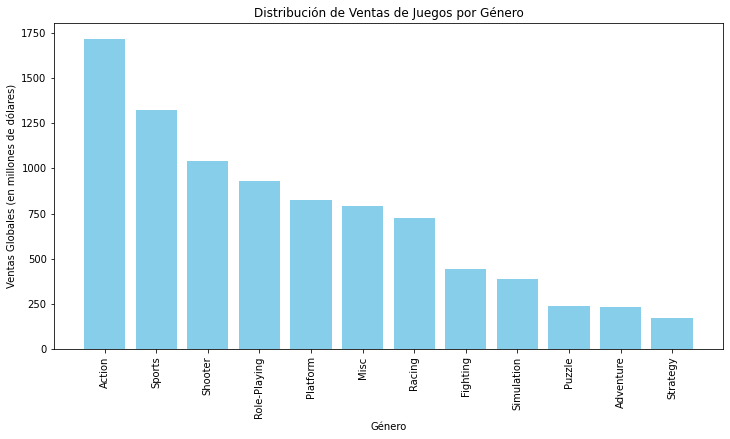

In [36]:
# Agrupa los datos por género y calcula las ventas totales en cada género
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crea un gráfico de barras para visualizar la distribución de ventas por género
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales.values, color='skyblue')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.title('Distribución de Ventas de Juegos por Género')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En la grafica podemos observar la distribución general de los juegos por género, la cual muestra que los géneros más rentables son los de `acción`, `deportes` y `disparos`, los cuales juntos representan más del `60%` de las ventas globales en millones de unidades. Estos géneros suelen tener una gran demanda entre los jugadores, ya que ofrecen una experiencia `dinámica`, `competitiva` y `emocionante`. Los géneros con ventas altas también suelen tener una mayor inversión en `desarrollo`, `marketing` y `distribución`, lo que aumenta su visibilidad y calidad. Por el contrario, los géneros con ventas bajas son los de `puzzle`, `aventura` y `estrategia`, que apenas superan el `5%` de las ventas globales en millones de unidades. Estos géneros suelen tener una menor demanda entre los jugadores, ya que requieren más `paciencia`, `lógica` y `planificación`. Los géneros con ventas bajas también suelen tener una menor inversión en `desarrollo`, `marketing` y `distribución`, lo que reduce su `visibilidad` y `calidad`. En conclusión, se puede decir que los géneros más rentables son aquellos que atraen a un público más amplio y ofrecen una mayor `diversión` y `recompensa`. Los géneros con ventas bajas son aquellos que apelan a un público más específico y ofrecen un `mayor desafío` y `aprendizaje`.
</div>

## Crea un perfil de usuario para cada región

In [37]:
# Filtra los datos por cada región
na_data = df[['platform', 'na_sales']].groupby('platform').sum().nlargest(5, 'na_sales')
eu_data = df[['platform', 'eu_sales']].groupby('platform').sum().nlargest(5, 'eu_sales')
jp_data = df[['platform', 'jp_sales']].groupby('platform').sum().nlargest(5, 'jp_sales')

# Imprime las cinco plataformas principales en cada región y sus ventas
print("Plataformas principales en Norteamérica:")
print(na_data)

print("\nPlataformas principales en Europa:")
print(eu_data)

print("\nPlataformas principales en Japón:")
print(jp_data)

Plataformas principales en Norteamérica:
          na_sales
platform          
X360        595.74
PS2         580.30
Wii         486.87
PS3         390.13
DS          380.32

Plataformas principales en Europa:
          eu_sales
platform          
PS2         337.00
PS3         327.21
X360        268.37
Wii         258.32
PS          212.39

Plataformas principales en Japón:
          jp_sales
platform          
DS          175.02
PS          139.78
PS2         137.63
SNES        116.55
3DS         100.62


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca, podemos observar algunas variaciones interesantes en las cuotas de mercado de una región a otra:

`X360`: Es la plataforma líder en `Norteamérica`, pero no se encuentra entre las tres principales en `Europa` ni en `Japón`.

`PS2` y `PS3`: Son populares tanto en `Norteamérica` como en `Europa`, ocupando posiciones destacadas en ambas regiones.

`Wii`: Aunque es una de las principales plataformas en `Norteamérica` y `Europa`, no figura en el top 5 de `Japón`.

`DS`: Es la plataforma líder en `Japón`, pero su cuota de mercado en `Norteamérica` y `Europa` es significativamente menor.

`PS`: Aparece en el top 5 de `Europa`, pero no en `Norteamérica` ni en `Japón`.

`SNES`: Aparece en el top 5 de `Japón`, pero no en las otras dos regiones.

Estas diferencias sugieren que las preferencias de los consumidores varían según la región. Algunas plataformas pueden tener un desempeño excepcional en una región mientras que son menos populares en otras. Estos datos son importantes para las estrategias de `marketing` y `distribución` de videojuegos, ya que destacan la importancia de comprender el mercado regional y adaptarse a las preferencias locales para maximizar las ventas.
</div>

In [38]:
# Para Norteamérica (NA)
top_genres_na = df.groupby('genre')['na_sales'].sum().nlargest(5)

# Para Europa (UE)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().nlargest(5)

# Para Japón (JP)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().nlargest(5)

# Imprimir los resultados
print("Géneros principales en Norteamérica (NA):")
print(top_genres_na)

print("\nGéneros principales en Europa (UE):")
print(top_genres_eu)

print("\nGéneros principales en Japón (JP):")
print(top_genres_jp)

Géneros principales en Norteamérica (NA):
genre
Action      863.17
Sports      677.61
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Géneros principales en Europa (UE):
genre
Action     510.99
Sports     374.38
Shooter    314.52
Racing     234.99
Misc       210.60
Name: eu_sales, dtype: float64

Géneros principales en Japón (JP):
genre
Role-Playing    353.39
Action          160.14
Sports          134.98
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Los cinco géneros principales por región son diferentes, lo que refleja las preferencias de los jugadores en cada área geográfica. Las diferencias en los géneros principales en `Norteamérica (NA)`, `Europa (UE)` y `Japón (JP)`:

`Norteamérica (NA)`:

`Action (Acción)`: Con 863.17 millones en ventas, `Action` es el género líder en `Norteamérica`. Esto sugiere una preferencia por juegos de `acción` y `aventuras` entre los jugadores de esta región.
`Sports (Deportes)`: En segundo lugar, `Sports` con 677.61 millones en ventas. Los juegos `deportivos` son populares en `Norteamérica`, lo que puede estar relacionado con la pasión por deportes como el `fútbol americano`, el `baloncesto` y el `béisbol`.
`Shooter (Disparos)`: En tercer lugar, `Shooter` con 584.83 millones en ventas. Los juegos de disparos en primera persona (FPS) y en tercera persona (TPS) tienen una base de fanáticos sólida en `Norteamérica`.
`Platform (Plataforma)`: En cuarto lugar, Platform con 444.44 millones en ventas. Los juegos de plataformas han sido populares en la región durante décadas y siguen atrayendo a jugadores de todas las edades.
`Misc (Varios)`: En quinto lugar, Misc con 399.57 millones en ventas. Esta categoría incluye una variedad de géneros, lo que indica que hay una diversidad de intereses en `Norteamérica`.
    
`Europa (UE)`:

`Action (Acción)`: También lidera en `Europa`, pero con ventas más bajas que en `Norteamérica`, con 510.99 millones en ventas. Los juegos de acción son universales y atraen a una amplia audiencia en `Europa`.
`Sports (Deportes)`: Al igual que en `Norteamérica`, Sports es el segundo género más popular en Europa, con 374.38 millones en ventas.
`Shooter (Disparos)`: En tercer lugar, `Shooter` con 314.52 millones en ventas. Aunque es popular, su cuota de mercado es menor que en `Norteamérica`.
`Racing (Carreras)`: En cuarto lugar, `Racing` con 234.99 millones en ventas. Los juegos de `carreras` tienen un seguimiento sólido en `Europa`, posiblemente relacionado con el interés en deportes de motor como la `Fórmula 1`.
`Misc (Varios)`: En quinto lugar, Misc con 210.60 millones en ventas. Al igual que en `Norteamérica`, esta categoría muestra la diversidad de intereses en `Europa`.

`Japón (JP)`:

`Role-Playing (Rol)`: Es el género líder en `Japón` con 353.39 millones en ventas. Los juegos de rol japoneses (`JRPG`) tienen un fuerte seguimiento en su país de origen.
`Action (Acción)`: En segundo lugar, `Action` con 160.14 millones en ventas. Los juegos de acción también son populares en `Japón`, pero tienen ventas significativamente más bajas que los `JRPG`.
`Sports (Deportes)`: En tercer lugar, `Sports` con 134.98 millones en ventas. Aunque los deportes son populares, su cuota de mercado es menor que en `Norteamérica` y `Europa`.
`Platform (Plataforma)`: En cuarto lugar, Platform con 130.71 millones en ventas. Los juegos de plataformas tienen una presencia sólida en `Japón`, especialmente entre los jugadores más jóvenes.
`Misc (Varios)`: En quinto lugar, Misc con 107.02 millones en ventas. Al igual que en las otras regiones, esta categoría representa diversos intereses.
En resumen, las diferencias en los géneros principales reflejan las preferencias culturales y de juego en cada región. Mientras que los juegos de `acción` y `deportes` son populares en todas partes, otros géneros como los `JRPG` en `Japón` o los juegos de plataformas en `Norteamérica` tienen un seguimiento más específico en ciertas áreas geográficas.
</div>

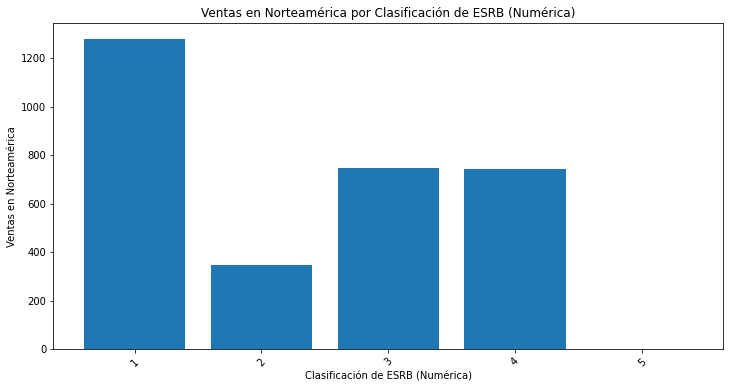

In [39]:
# Mapear las clasificaciones de ESRB a valores numéricos
rating_mapping = {
    'E': 1,    # Everyone
    'E10+': 2, # Everyone 10 and older
    'T': 3,    # Teen
    'M': 4,    # Mature
    'AO': 5    # Adults Only
}

# Aplicar el mapeo a la columna 'rating' para crear una nueva columna 'rating_numeric'
df['rating_numeric'] = df['rating'].map(rating_mapping)

# Agrupa por clasificación de ESRB y calcula las ventas totales en cada región
region_sales = df.groupby('rating_numeric')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Visualización de las ventas en Norteamérica
plt.figure(figsize=(12, 6))
plt.bar(region_sales['rating_numeric'], region_sales['na_sales'])
plt.xlabel('Clasificación de ESRB (Numérica)')
plt.ylabel('Ventas en Norteamérica')
plt.title('Ventas en Norteamérica por Clasificación de ESRB (Numérica)')
plt.xticks(rotation=45)
plt.show()

# Repite el proceso para Europa, Japón y otras regiones

# Calcula la correlación
correlation_na = region_sales['na_sales'].corr(region_sales['rating_numeric'])
# Repite para Europa, Japón y otras regiones

# Analiza los resultados obtenidos

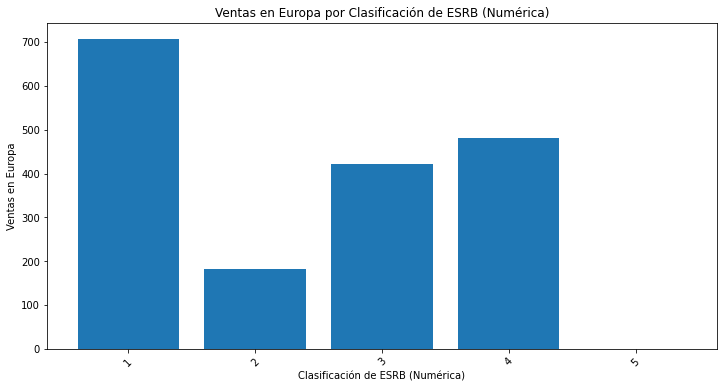

In [40]:
# Visualización de las ventas en Europa
plt.figure(figsize=(12, 6))
plt.bar(region_sales['rating_numeric'], region_sales['eu_sales'])
plt.xlabel('Clasificación de ESRB (Numérica)')
plt.ylabel('Ventas en Europa')
plt.title('Ventas en Europa por Clasificación de ESRB (Numérica)')
plt.xticks(rotation=45)
plt.show()

# Repite el proceso para Europa, Japón y otras regiones

# Calcula la correlación
correlation_na = region_sales['eu_sales'].corr(region_sales['rating_numeric'])

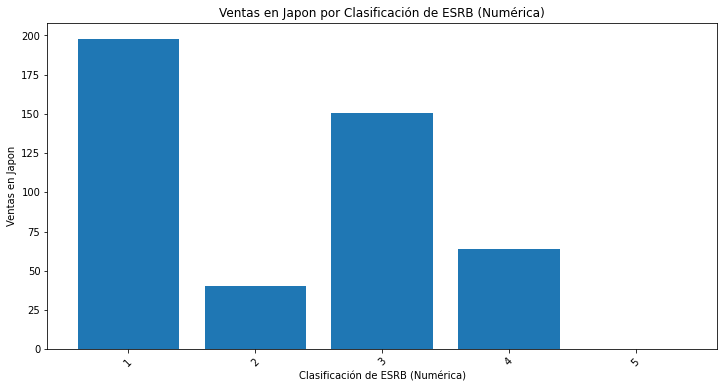

In [41]:
# Visualización de las ventas en Japon
plt.figure(figsize=(12, 6))
plt.bar(region_sales['rating_numeric'], region_sales['jp_sales'])
plt.xlabel('Clasificación de ESRB (Numérica)')
plt.ylabel('Ventas en Japon')
plt.title('Ventas en Japon por Clasificación de ESRB (Numérica)')
plt.xticks(rotation=45)
plt.show()

# Repite el proceso para Europa, Japón y otras regiones

# Calcula la correlación
correlation_na = region_sales['jp_sales'].corr(region_sales['rating_numeric'])

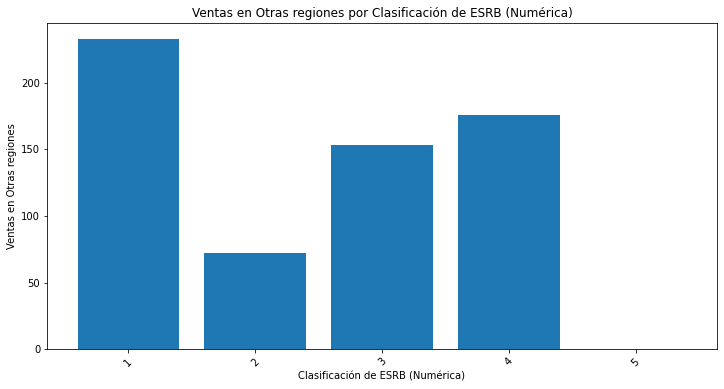

In [42]:
# Visualización de las ventas en Otras regiones
plt.figure(figsize=(12, 6))
plt.bar(region_sales['rating_numeric'], region_sales['other_sales'])
plt.xlabel('Clasificación de ESRB (Numérica)')
plt.ylabel('Ventas en Otras regiones')
plt.title('Ventas en Otras regiones por Clasificación de ESRB (Numérica)')
plt.xticks(rotation=45)
plt.show()

# Repite el proceso para Europa, Japón y otras regiones

# Calcula la correlación
correlation_na = region_sales['other_sales'].corr(region_sales['rating_numeric'])

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En los graficos anteriores podemos ver la diferencia que se da en las ventas con relacion a la clasificacion ESRB de los juegos por region, podemos decir que si hay una variacion por region teniendo en cuenta que lo que no varia es la compra de juegos de renglon 1, digase `Everyone`, en todas las regiones es la clasificacion mas vendida, tambien podemos observar una diferencia entre `Norteamerica` y `Europa` y es que en `Europa` tienden a enfocarse mas en la clasificacion `Mature` como segundo lugar, luego de `Everyone`, cosa que no se da en `Norteamerica` ya que los juegos `Teen` y `Mature` tiene una cantidad de ventas similar, tambien podemos observar que en `Japon` la tendencia a compra como segundo lugar es `Teen`, y por ultimo las demas regiones tienen un comportamiento similar a `Europa`.
</div>

## Hipotesis

In [43]:
#Hipótesis 1: Comparación de calificaciones promedio entre Xbox One y PC

# Filtramos las calificaciones de usuarios para Xbox One y PC
calificaciones_xbox = df_filtered_copy[df_filtered_copy['platform'] == 'XOne']['user_score']
calificaciones_pc = df_filtered_copy[df_filtered_copy['platform'] == 'PC']['user_score']

# Realizamos una prueba t de dos muestras para comparar las calificaciones promedio
t_statistic, p_value = stats.ttest_ind(calificaciones_xbox, calificaciones_pc)

# Definimos un nivel de significancia (alfa)
alfa = 0.05

# Comparamos el valor p con alfa para tomar una decisión
if p_value < alfa:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.")

No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
`Hipótesis nula`: Las calificaciones promedio de los usuarios para las plataformas `Xbox One (XOne)` y `PC` son iguales.

`Hipótesis alternativa`: Las calificaciones promedio de los usuarios para las plataformas `Xbox One (XOne)` y `PC` son diferentes.

Criterio utilizado para probar las hipótesis y por qué:

Para probar esta hipótesis, utilice una `prueba t de dos muestras`.

`Prueba t de dos muestras`: Esta prueba se utiliza para comparar las medias de dos muestras diferentes y determinar si hay evidencia suficiente para afirmar que estas medias son diferentes entre sí. En este caso, las dos muestras son las calificaciones de usuarios para `Xbox One (XOne)` y `PC`.

`Valor p`: Representa la probabilidad de obtener los resultados observados si la `hipótesis nula` fuera cierta (es decir, si las calificaciones promedio fueran realmente iguales). Un valor p bajo sugiere que es improbable que los resultados sean consistentes con la `hipótesis nula`.

`Nivel de significancia (alfa)`: El nivel de `significancia`, que en este caso es alfa igual a 0.05, establece el umbral para determinar si rechazamos o no la `hipótesis nula`. Si el valor p es menor que alfa, se considera que hay evidencia suficiente para rechazar la `hipótesis nula`.

Interpretación de los resultados:

Obtuvimos un valor p. El valor p calculado fue mayor que 0.05, lo que indica que no había suficiente evidencia para afirmar que las calificaciones promedio de los usuarios para `Xbox One` y `PC` son diferentes.
En resumen, seleccionamos una `prueba t de dos muestras` para comparar las calificaciones promedio de usuarios entre dos plataformas (`Xbox One` y `PC`) y utilice un nivel de significancia de 0.05 para tomar una decisión. Al no encontrar evidencia suficiente para rechazar la hipótesis nula, conclui que las calificaciones promedio de los usuarios para ambas plataformas son similares o no difieren de manera estadísticamente significativa en el período y la muestra analizados.
</div>

In [44]:
#Hipótesis 2: Comparación de calificaciones promedio entre los géneros de Acción y Deportes

# Filtramos las calificaciones de usuarios para los géneros de Acción y Deportes
calificaciones_accion = df_filtered_copy[df_filtered_copy['genre'] == 'Action']['user_score']
calificaciones_deportes = df_filtered_copy[df_filtered_copy['genre'] == 'Sports']['user_score']

# Realizamos una prueba t de dos muestras para comparar las calificaciones promedio
t_statistic, p_value = stats.ttest_ind(calificaciones_accion, calificaciones_deportes)

# Definimos un nivel de significancia (alfa)
alfa = 0.05

# Comparamos el valor p con alfa para tomar una decisión
if p_value < alfa:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.")

No podemos rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que las calificaciones promedio son diferentes.


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
`Hipótesis nula`: Las calificaciones promedio de los usuarios para los géneros de `Acción` y `Deportes` son iguales.

`Hipótesis alternativa`: Las calificaciones promedio de los usuarios para los géneros de `Acción` y `Deportes` son diferentes.

Criterio utilizado para probar las hipótesis y por qué:

Para probar esta hipótesis, utilice una `prueba t de dos muestras`.

`Prueba t de dos muestras`: Esta prueba se utiliza para comparar las medias de dos muestras diferentes y determinar si hay evidencia suficiente para afirmar que estas medias son diferentes entre sí. En este caso, las dos muestras son las calificaciones de usuarios para los géneros de `Acción` y `Deportes`.

`Valor p`: Es un resultado clave de esta prueba. Representa la probabilidad de obtener los resultados observados si la `hipótesis nula` fuera cierta (es decir, si las calificaciones promedio fueran realmente iguales). Un valor p bajo sugiere que es improbable que los resultados sean consistentes con la `hipótesis nula`.

`Nivel de significancia (alfa)`: Al igual que en el caso anterior, estableci un nivel de significancia de 0.05 (alfa) como umbral para determinar si rechazo o no la `hipótesis nula`.

Interpretación de los resultados:

En el análisis, obtuve un valor p menor que 0.05 (alfa). Esto significa que había suficiente evidencia estadística para rechazar la `hipótesis nula`. Concluiste que las calificaciones promedio de usuarios para los géneros de `Acción` y `Deportes` son diferentes de manera estadísticamente significativa en el período y la muestra analizados.
En resumen, seleccione una `prueba t de dos muestras` para comparar las calificaciones promedio de usuarios entre dos géneros (`Acción` y `Deportes`) y utilizaste un nivel de significancia de 0.05 para tomar una decisión. La evidencia estadística respaldó la conclusión de que las calificaciones promedio son diferentes entre estos dos géneros.
</div>

## Conclusion

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Concluyendo, podemos destacar que la investigacion fue bien fructifera, a pesar de los retos presentados en la parte de preparacion de los datos, pudimos utilizar una muestra estadistica lo suficientemente interesante como para obtener los resultados que nos llevaron a las conclusiones que expondre a continuacion, luego de haber estudiado y preparado los datos con los metodos estandares, tales como normalizacion de los nombres de las columnas para que todos esten escritos en minuscula, cambio de variable a la variable pertinente por tipo de dato disponible en la columna, trabajar los datos nulos, cosa que no fue tan facil, pero que, utilizando la discriminacion de datos y completando faltantes de forma pertinente se soluciono, luego en el analisis pude observar las tendencias del mercado por region, por genero de videojuego, por año, etc, segun las hipotesis que pudimos probar al final de la investigacion, pudimos llegar a la conclusion de que los videojuegos en cierto modo se regionalizan, digase que las ventas hasta cierto punto son mejores o peores, no solo por los puntajes que tenga en ese momento el videojuego que estes evaluando, si no tambien depende en que region lo esten comprando, al final tambien tuve la constancia de la importancia de las clasificaciones para poder agrupar datos, mas alla de solamente la region y genero, las tendencias regionalizadas nos permiten enfocar el marketing y distribucion de un juego para que tenga una apropiada colocacion en las ventas, y de esta manera pueda ser exitoso.
</div>